In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest, is_msoa_data_ready
from msoa_composite import check_path
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from vaccination import vaccination_dashboard, vaccination_corrections
import requests

In [5]:
release=None

In [21]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-01-24,2021-01-21,United Kingdom,K02000001,30151,NaN,887.0,665330.0
1,2021-01-24,2021-01-20,United Kingdom,K02000001,34625,4013.0,1028.0,640856.0
2,2021-01-24,2021-01-19,United Kingdom,K02000001,39112,4128.0,1159.0,579194.0
3,2021-01-24,2021-01-18,United Kingdom,K02000001,44633,4041.0,1173.0,556689.0
4,2021-01-24,2021-01-17,United Kingdom,K02000001,28770,3718.0,1118.0,417329.0
...,...,...,...,...,...,...,...,...
353,2021-01-24,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
354,2021-01-24,2020-02-02,United Kingdom,K02000001,0,NaN,NaN,NaN
355,2021-01-24,2020-02-01,United Kingdom,K02000001,1,NaN,NaN,NaN
356,2021-01-24,2020-01-31,United Kingdom,K02000001,1,NaN,NaN,NaN


In [22]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-01-24.csv')

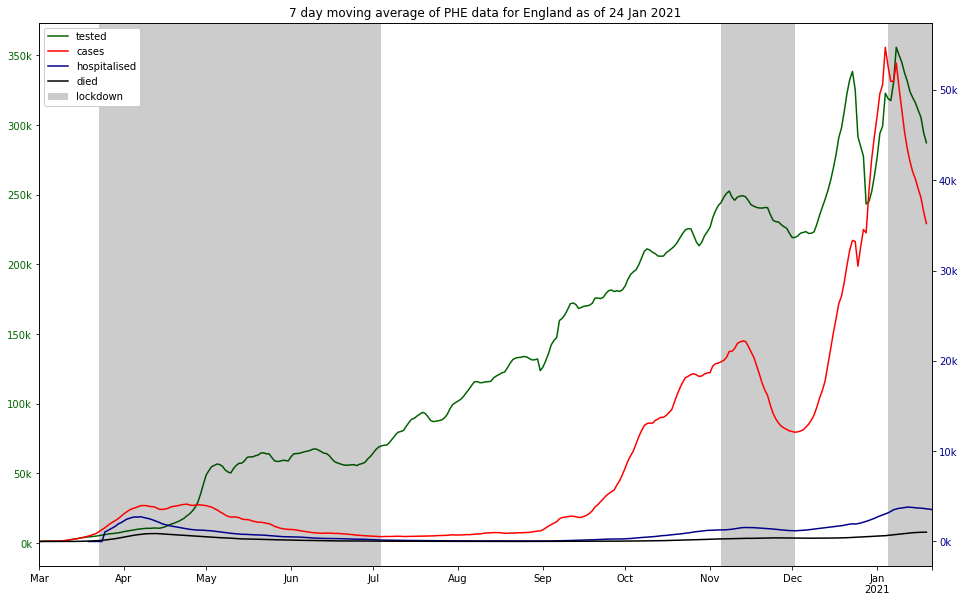

In [23]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [24]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-01-24.csv')

In [25]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-01-24.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,Northern Ireland,N92000002,23434.0,155644.0,132210.0,1893667,1.237493,6.981692,91.780815
1,Scotland,S92000003,5383.0,404038.0,398655.0,5463300,0.098530,7.296963,92.604506
2,Wales,W92000004,516.0,264538.0,264022.0,3152879,0.016366,8.373997,91.609637
3,England,E92000001,441074.0,5529101.0,5088027.0,56286961,0.783617,9.039442,90.176942


'6,353,321'

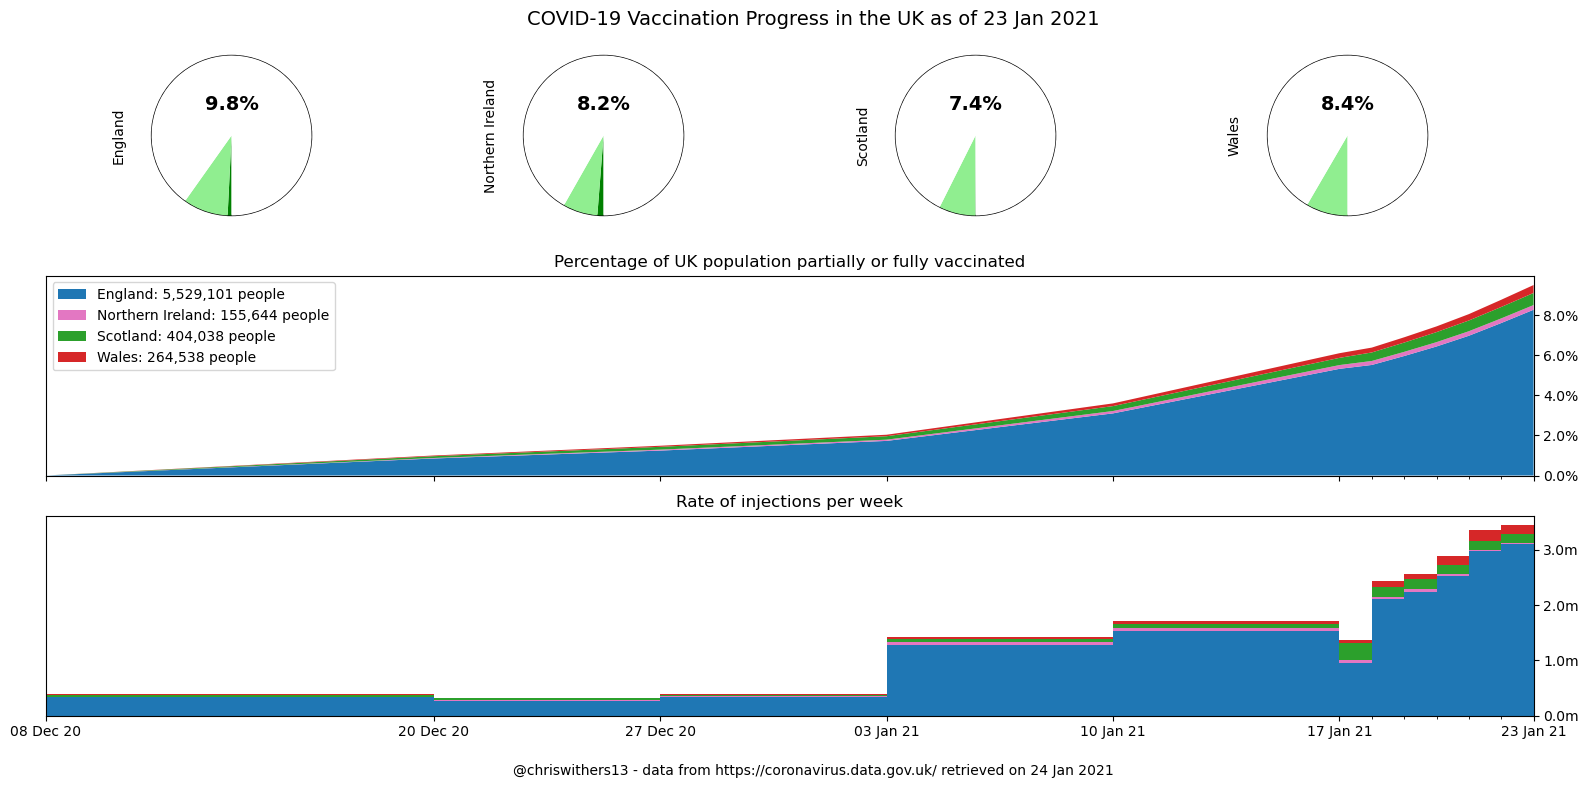

In [26]:
results = vaccination_dashboard()
display(results)
f"{results['any'].sum():,.0f}"

In [27]:
vaccination_corrections()

In [28]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-01-24.csv')

In [29]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-01-24.csv')

In [30]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-01-24.csv')

In [31]:
if is_msoa_data_ready():
    path = download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, 'release', release=release)
    display(path)
    check_path(path)

today: 2021-01-24, release: 2021-01-24 16:00:04.504321+00:00, msoa: 2021-01-24 16:18:01+00:00


PosixPath('/Users/chris/coronavirus/data/msoa_2021-01-24.csv')